In [13]:
# import files and adjust formating
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# set display options for pandas
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.2f}".format

# import the data
training = pd.read_csv(filepath_or_buffer='train.csv')
testing = pd.read_csv(filepath_or_buffer='test.csv')

# find statistics about the data set
training.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,Price
count,818.00,818.00,818.00,818.00,818.00,818.00,818.00,818.00,818.00,818.00,...,818.00,818.00,818.00,818.00,818.00,818.00,818.00,818.00,818.00,818.00
mean,729.38,70.24,1.00,6.23,5.56,1972.86,0.44,0.60,1.08,1.17,...,1.03,6.57,0.61,1.89,0.51,0.90,0.48,0.22,6.31,1.86
std,424.52,24.92,0.55,1.37,1.03,30.96,0.48,0.45,0.44,0.39,...,0.18,1.57,0.61,0.66,0.19,1.19,0.68,0.63,2.76,0.82
min,1.00,21.00,0.13,2.00,2.00,1880.00,0.00,0.00,0.00,0.44,...,1.00,3.00,0.00,1.00,0.16,0.00,0.00,0.00,1.00,0.35
25%,356.50,59.25,0.76,5.00,5.00,1954.00,0.00,0.26,0.80,0.89,...,1.00,5.00,0.00,1.00,0.37,0.00,0.00,0.00,4.00,1.32
50%,726.50,70.00,0.95,6.00,5.00,1975.00,0.37,0.51,1.01,1.11,...,1.00,6.00,1.00,2.00,0.48,0.00,0.28,0.00,6.00,1.67
75%,1103.75,80.00,1.13,7.00,6.00,2004.00,0.71,0.85,1.34,1.39,...,1.00,8.00,1.00,2.00,0.60,1.68,0.69,0.00,8.00,2.19
max,1460.00,313.00,7.08,10.00,9.00,2009.00,5.64,2.15,6.11,4.69,...,2.00,12.00,3.00,4.00,1.42,8.57,5.47,5.52,12.00,7.55


There are 818 records in the training set. The mean price is 1.86. The minimal price is 0.35 and the maximum price is 7.55. The standard deviation of price is 0.86.

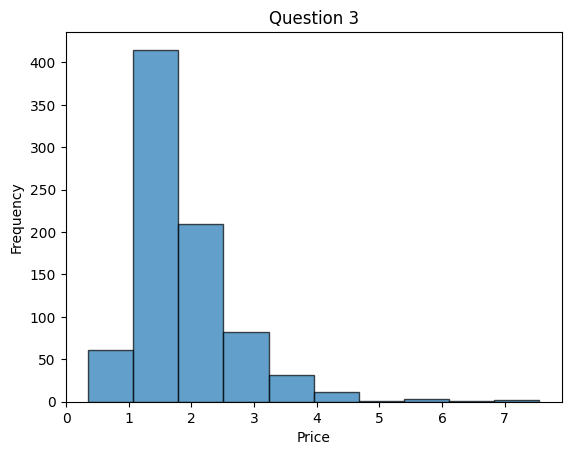

In [14]:
# create a histogram of the prices
prices = training['Price']
plt.hist(prices, bins=10, edgecolor='black', alpha=0.7)

# label and display the histogram
plt.title('Question 3')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

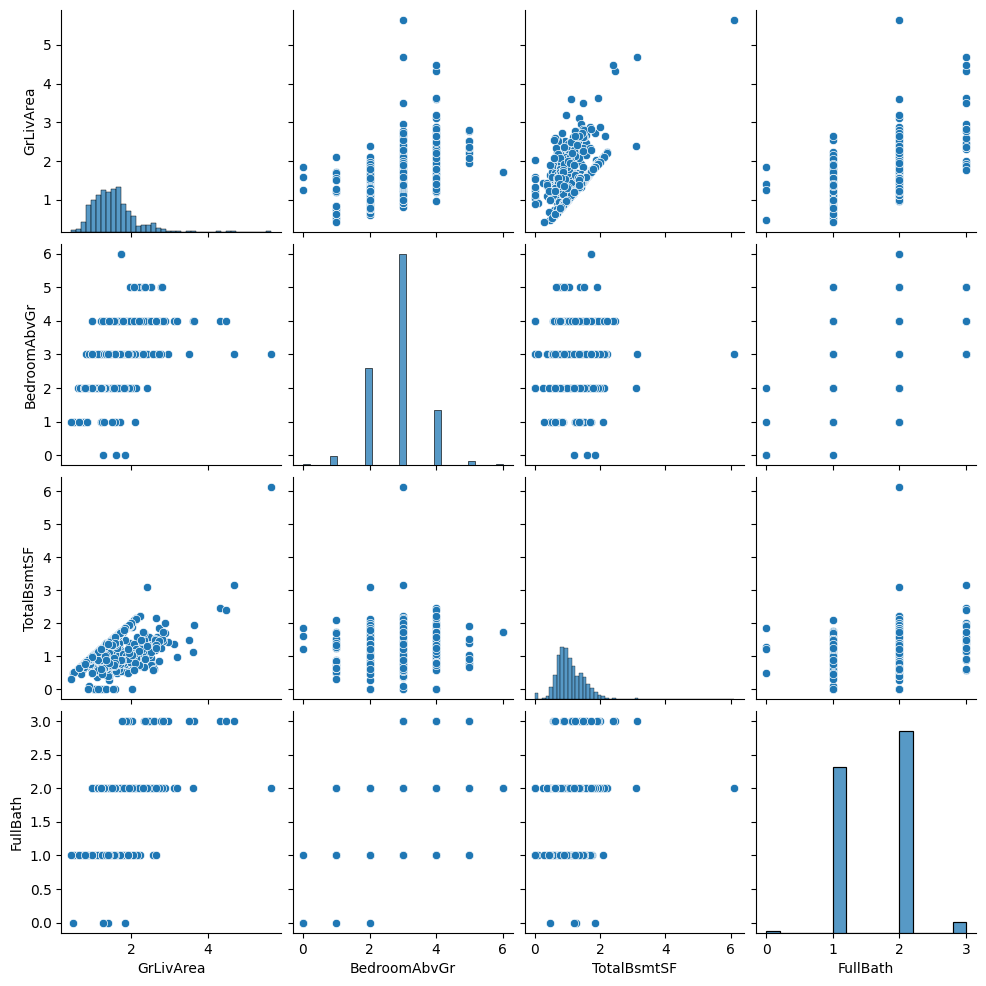

In [15]:
# compare the given features against each other to determine which are correlated
col = ['GrLivArea', 'BedroomAbvGr', 'TotalBsmtSF', 'FullBath']
sns.pairplot(training[col], height = 2.5)
plt.show()

GrLivArea and TotalBsmtSF are the most correlated pairing out of the given features.
You could use the correlation between them to accelerate training by considering just one or the other, not both.

In [16]:
class Model:    # create a class for the Model to contain it's functions
    def __init__(self,X):
        self.X = X.drop(['Id','Price'],axis=1)      # data set that the model is using
        self.prices = X['Price']   # vector of the actual prices
        self.W = np.zeros(self.X.shape[1])  # initialize the weights

    def pred(self,X):   # method to get predicted values of X
        return np.dot(X,self.W)     # return a vector of the predicted prices
    
    def loss(self,pred,act):    # method to determine the MSE of the predicted values
        diff = pred - act   # get the difference between the predicted and actual prices
        diffsq = diff**2    # square the difference
        Y = len(pred)   # find the amount of entries
        return (1/Y) * np.sum(diffsq)     # returns float of the MSE
    
    def gradient(self,pred,act,X):    # method to determine the gradient of the model
        diff = pred - act   # get the difference between the predicted and actual prices
        Y = len(pred)   # find the amount of entries
        return (2/Y) * np.dot(X.T, diff)      # returns the gradient as a float
    
    def update(self,a,gradient):    # method to update the weight used in the model
        agradient = a * gradient    # get the numbers that you are adjusting the weights by
        self.W -= agradient      # update the weight

    def train(self,a,iterations):
        x,y = [],[]     # empty lists for graphing
        X = self.X  # matrix of the features
        act = self.prices   # actual prices
        for i in range(iterations):     # for each iteration...
            pred = self.pred(X)     # get the predicted prices
            loss = self.loss(pred,act)   # calculate the loss
            gradient = self.gradient(pred,act,X)   # set the gradient
            self.update(a,gradient)     # update the weights

            print(f'Iteration {i + 1}/{iterations}, Loss: {loss}')
            
        print('Training Complete.')
        return x,y  # return the iterations and loss

Iteration 1/100, Loss: 4.1452703354986555
Iteration 2/100, Loss: 8486507103016.321
Iteration 3/100, Loss: 2.06345479415623e+25
Iteration 4/100, Loss: 5.01719451621411e+37
Iteration 5/100, Loss: 1.2199075494562565e+50
Iteration 6/100, Loss: 2.9661485605372176e+62
Iteration 7/100, Loss: 7.212052492911055e+74
Iteration 8/100, Loss: 1.7535770747465203e+87
Iteration 9/100, Loss: 4.263741230529183e+99
Iteration 10/100, Loss: 1.0367088816750375e+112
Iteration 11/100, Loss: 2.520709506591038e+124
Iteration 12/100, Loss: 6.12898811704222e+136
Iteration 13/100, Loss: 1.4902350009242553e+149
Iteration 14/100, Loss: 3.6234372062242603e+161
Iteration 15/100, Loss: 8.810219313938657e+173
Iteration 16/100, Loss: 2.1421639162495725e+186
Iteration 17/100, Loss: 5.20857209175447e+198
Iteration 18/100, Loss: 1.2664401182940486e+211
Iteration 19/100, Loss: 3.0792903409433114e+223
Iteration 20/100, Loss: 7.487151478270836e+235
Iteration 21/100, Loss: 1.8204661156245643e+248
Iteration 22/100, Loss: 4.426378

C:\Users\tmurp\AppData\Local\Temp\ipykernel_900\384498846.py:23: RuntimeWarning: invalid value encountered in subtract
  self.W -= agradient      # update the weight


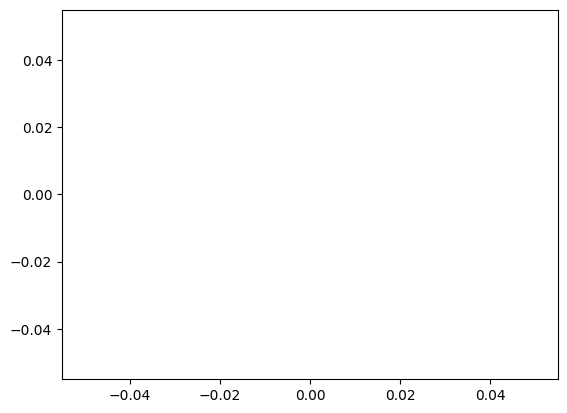

In [17]:
q10 = Model(training)   # create a Model object for question 10

x,y = q10.train(0.2,100)    # call the training function with the specified parameters
plt.plot(x,y)   # create a basic plot of the test
plt.show()

When a is 0.2, the algorithm does not find a minimal MSE. At the 26th iteration, the loss becomes infinite. This is most likely due to the learning rate being too high.

Iteration 1/500, Loss: 4.1452703354986555
Iteration 2/500, Loss: 4.1447261074840815
Iteration 3/500, Loss: 4.144181964328073
Iteration 4/500, Loss: 4.1436379060173945
Iteration 5/500, Loss: 4.143093932538819
Iteration 6/500, Loss: 4.142550043879118
Iteration 7/500, Loss: 4.142006240025068
Iteration 8/500, Loss: 4.141462520963442
Iteration 9/500, Loss: 4.140918886681022
Iteration 10/500, Loss: 4.1403753371645875
Iteration 11/500, Loss: 4.13983187240092
Iteration 12/500, Loss: 4.139288492376808
Iteration 13/500, Loss: 4.138745197079036
Iteration 14/500, Loss: 4.138201986494392
Iteration 15/500, Loss: 4.13765886060967
Iteration 16/500, Loss: 4.137115819411662
Iteration 17/500, Loss: 4.136572862887162
Iteration 18/500, Loss: 4.136029991022967
Iteration 19/500, Loss: 4.135487203805879
Iteration 20/500, Loss: 4.134944501222696
Iteration 21/500, Loss: 4.134401883260225
Iteration 22/500, Loss: 4.133859349905269
Iteration 23/500, Loss: 4.133316901144637
Iteration 24/500, Loss: 4.132774536965137

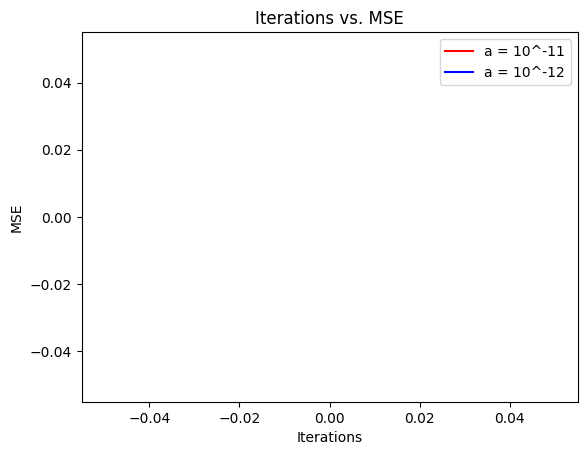

In [18]:
# create two training models, one for each of the given a values
a1 = Model(training)
a2 = Model(training)

# define the learning rate exponent and the number of iterations
exp = 11    # the exponent of the learning rate
# exp for the first training, exp+1 for the second
iterations = 500

# train the models and get the iterations and loss for each to graph
x1,y1 = a1.train(10**-(exp),iterations)
x2,y2 = a2.train(10**-(exp+1),iterations)

# graph the results of the training sessions
plt.plot(x1,y1,color='red',label='a = 10^-%s'%exp)
plt.plot(x2,y2,color='blue',label='a = 10^-%s'%(exp+1))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Iterations vs. MSE')
plt.legend()
plt.show()

In this example, neither of the learning rates converge because the learning rate and number of iterations are both too small. a = 10^-11 will converge faster because larger learning rates tend to converge faster, while smaller rates tend to provide more precise updates.

Iteration 1/500, Loss: 4.1452703354986555
Iteration 2/500, Loss: 3.810318645214848
Iteration 3/500, Loss: 3.5075108244982234
Iteration 4/500, Loss: 3.233762153443348
Iteration 5/500, Loss: 2.986283940501946
Iteration 6/500, Loss: 2.762555113813414
Iteration 7/500, Loss: 2.560296538802881
Iteration 8/500, Loss: 2.3774478004177086
Iteration 9/500, Loss: 2.2121462134808367
Iteration 10/500, Loss: 2.062707847337418
Iteration 11/500, Loss: 1.9276103714910005
Iteration 12/500, Loss: 1.8054775474760882
Iteration 13/500, Loss: 1.6950652089842961
Iteration 14/500, Loss: 1.5952485874222957
Iteration 15/500, Loss: 1.5050108537857885
Iteration 16/500, Loss: 1.4234327601244705
Iteration 17/500, Loss: 1.3496832750745975
Iteration 18/500, Loss: 1.2830111180624129
Iteration 19/500, Loss: 1.2227371059365633
Iteration 20/500, Loss: 1.168247234063896
Iteration 21/500, Loss: 1.1189864214051055
Iteration 22/500, Loss: 1.0744528558507043
Iteration 23/500, Loss: 1.0341928822127178
Iteration 24/500, Loss: 0.9

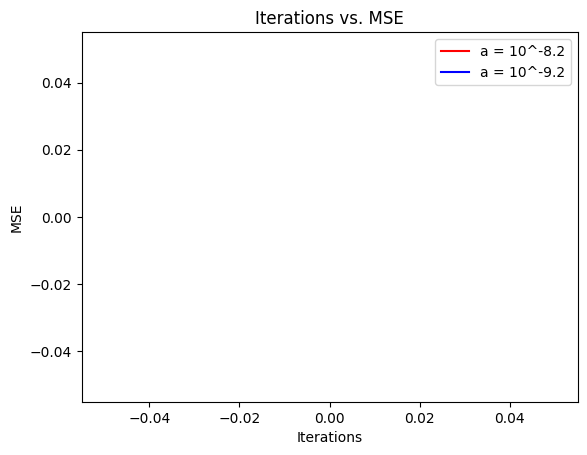

In [19]:
# create two training models that will converge withing 500 iterations
b1 = Model(training)
b2 = Model(training)

# define the learning rate exponent and the number of iterations
exp = 8.2    # the exponent of the learning rate
# exp for the first training, exp+1 for the second
iterations = 500

# train the models and get the iterations and loss for each to graph
x1,y1 = b1.train(10**-(exp),iterations)
x2,y2 = b2.train(10**-(exp+1),iterations)

# graph the results of the training sessions
plt.plot(x1,y1,color='red',label='a = 10^-%s'%exp)
plt.plot(x2,y2,color='blue',label='a = 10^-%s'%(exp+1))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Iterations vs. MSE')
plt.legend()
plt.show()

In [12]:
test = Model(testing)   # create a Model using the test data set
test.W = b2.W   # set the weight of the test set to the final weight of the training set where a = 10^-12
testPred = test.pred(test.X)  # get the predicted values for Price based on the weight
print('MSE of the testing set with the weight of the training set when a = 10^-%s:\t%s'%(exp+1,test.loss(testPred,test.prices)))    # print the MSE of the test

MSE of the testing set with the weight of the training set when a = 10^-9.2:	0.7195997092453911


In general, it is more likely that a model will achieve a better MSE on a training set because that is the data that the model was specifically trained to predict data for.